In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from text_analytics.config import RAW_DATA_PATH, SENTIMENT_CLEANED_DATA_PATH

# define the path to the style sheet
style_sheet = "../styles/base.mplstyle"
plt.style.use(style_sheet)

# display option to 30 columns - same can be done for rows
pd.set_option("display.max_columns", 30)

%matplotlib inline

['#e31a1c', '#33a02c', '#ff7f00', '#1f78b4', '#6a3d9a', '#fb9a99', '#b2df8a', '#fdbf6f', '#a6cee3', '#cab2d6']


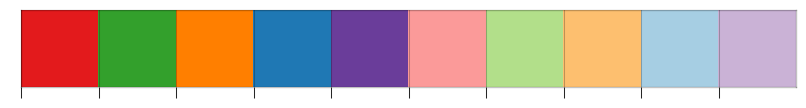

In [14]:
pal = sns.color_palette(
    [
        "#E31A1C",
        "#33A02C",
        "#FF7F00",
        "#1F78B4",
        "#6A3D9A",
        "#FB9A99",
        "#B2DF8A",
        "#FDBF6F",
        "#A6CEE3",
        "#CAB2D6",
    ]
)
sns.palplot(pal)
print(pal.as_hex())

In [15]:
df = pd.read_csv(SENTIMENT_CLEANED_DATA_PATH, index_col=0)
df.head()

,preprocessed_review,length,class
0,"['one', 'reviewer', 'mentioned', 'watching', '...",216,1
1,"['wonderful', 'little', 'production', '.', 'in...",108,1
2,"['thought', 'wonderful', 'way', 'spend', 'time...",111,1
3,"['basically', 'there', ""'s"", 'family', 'little...",80,0
4,"['petter', 'mattei', ""'s"", '``', 'love', 'time...",148,1


In [16]:
df.describe()

,length,class
count,49582.000000,49582.000000
mean,152.626679,0.501876
std,116.240737,0.500002
min,4.000000,0.000000
25%,81.000000,0.000000
50%,113.000000,1.000000
75%,186.000000,1.000000
max,1724.000000,1.000000


In [17]:
df['class'].value_counts()

1    24884
0    24698
Name: class, dtype: int64

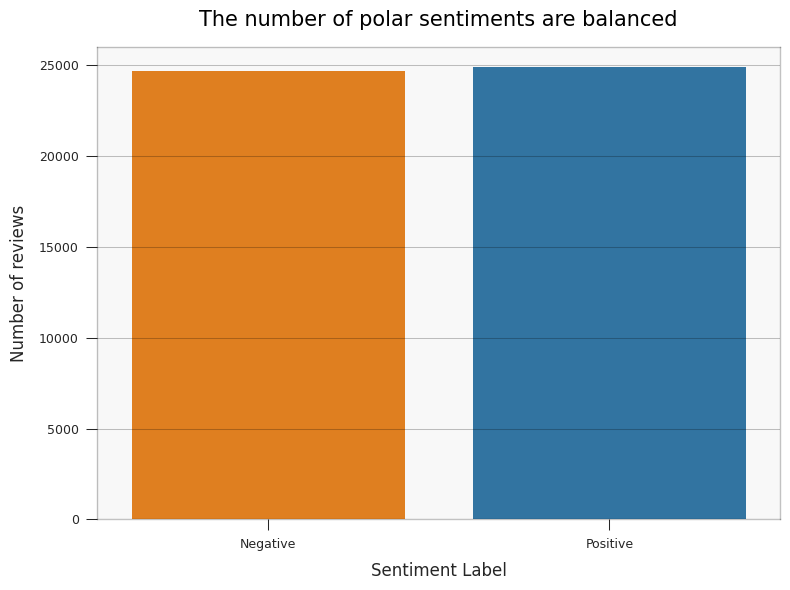

In [18]:
fig, ax = plt.subplots(1, 1)

# take any of the colours from above
sns.countplot(
    data=df,
    x="class",
    ax=ax,
    palette=pal.as_hex()[2:4],
)
ax.set_title("The number of polar sentiments are balanced", fontsize=15)
ax.set_xlabel("Sentiment Label")
ax.set_ylabel("Number of reviews")
ax.set_ylim(bottom=0, top=26000)
ax.set_xticklabels(labels=["Negative", "Positive"])
plt.tight_layout()

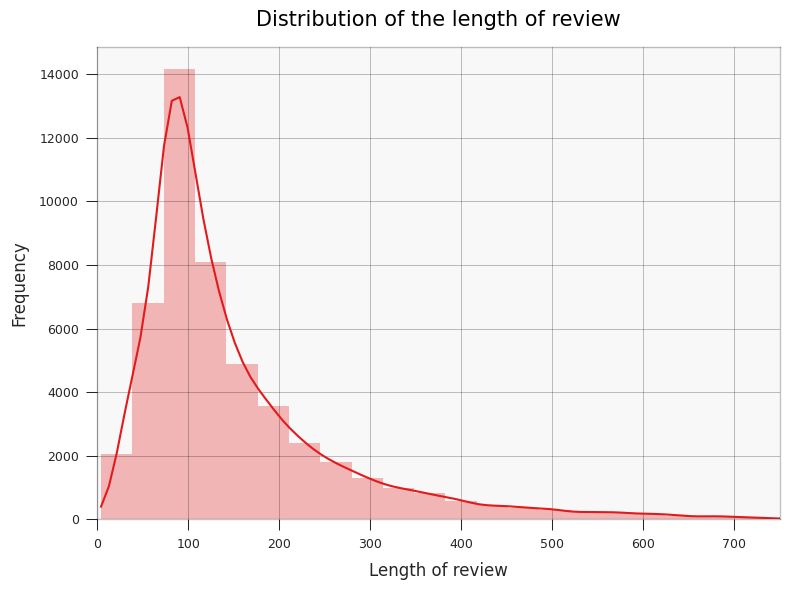

In [19]:
fig, ax = plt.subplots(1, 1)

sns.histplot(
    data=df,
    x="length",
    bins = 50,
    ax=ax,
    kde=True,
    linewidth=0,
    alpha=0.3
)

ax.set_title("Distribution of the length of review", fontsize=15)

ax.set_xlabel("Length of review")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 750)
plt.tight_layout()


In [20]:
from wordcloud import STOPWORDS
from text_analytics.config import WORDCLOUD_DATA_PATH

In [21]:
# define a function to plot wordcloud excluding all the stopwords
# stop_list = set(stopwords.words("english"))
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        width=1600,
        height=800,
        max_words=200,
        background_color='white',
        stopwords=set(STOPWORDS).update({"one", "film", "movie"}),
        collocations=False,
        margin=10,
        random_state=2022,
    ).generate(data)
    
    #plot the word cloud
    default_colors = wordcloud.to_array()
    plt.figure(figsize=(20, 10))
    plt.axis("off")
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.tight_layout(pad=0)

In [22]:
df_raw = pd.read_csv('IMDB Dataset_clean.csv', index_col=0)
df_raw.head()

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB Dataset_clean.csv'

In [ ]:
df = df_raw[~df_raw.duplicated()]
df.shape

In [ ]:
# define a function to plot wordcloud excluding all the stopwords
# stop_list = set(stopwords.words("english"))
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        width=1600,
        height=800,
        max_words=100,
        background_color='white',
        stopwords=['one'],
        collocations=False,
        margin=10,
        random_state=2022,
    ).generate(data)
    
    #plot the word cloud
    default_colors = wordcloud.to_array()
    plt.figure(figsize=(20, 10))
    plt.axis("off")
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.tight_layout(pad=0)
    
    '''
    fig = plt.figure(1, figsize=(10, 8))
    plt.axis('off')
    plt.title(title)
    plt.imshow(wordcloud)
    plt.show()
    '''

In [ ]:
labels = df['sentiment'].unique()
for l in labels:
    wc = ' '.join(df['clean'][df['sentiment']==l])
    show_wordcloud(wc, l)